# Map features from other channels/images

Import packages

In [1]:
from skimage import io, data, morphology, filters, measure, transform
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from colormaps import glasbey_cmap
from linked_regionprops import linked_regionprops_table, mode

## Example data

In [2]:
image = data.hubble_deep_field()[:500, :500]
ch0 = transform.resize(np.rot90(data.hubble_deep_field()[600:660,800:860,2], 3), (500, 500), preserve_range=True)
ch1 = transform.resize(np.rot90(data.hubble_deep_field()[750:, :250, 2], 3), (500, 500), preserve_range=True)
image[...,0] = ch0
image[...,1] = ch1

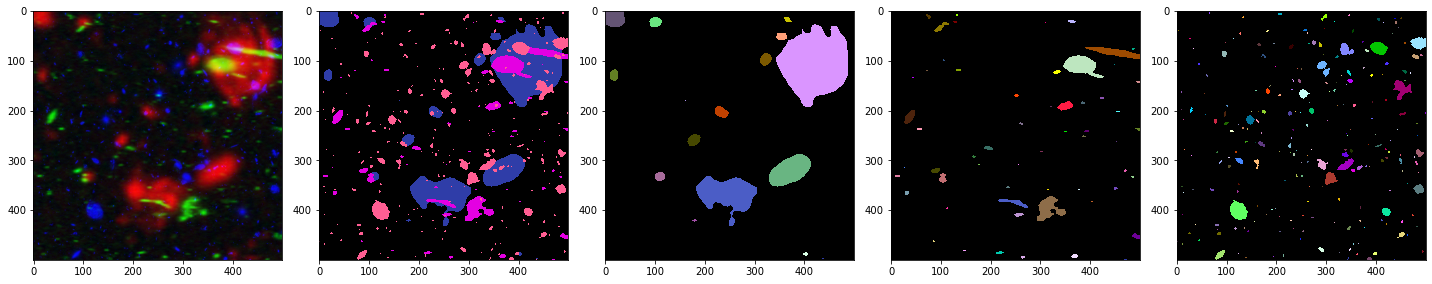

In [3]:
fig, ax = plt.subplots(1,5, figsize=(20,6))
glasbey_cm = glasbey_cmap()
labels_array = np.zeros_like(image)
image_cum_bin = np.zeros((image.shape[0], image.shape[1]), dtype=int)
for i in range(image.shape[-1]):
    ax[0].imshow(image)
    image_gauss = filters.gaussian(image[...,i])
    th = filters.threshold_otsu(image_gauss)
    image_bin = image_gauss > th
    image_bin = morphology.binary_closing(image_bin, morphology.disk(2))
    image_bin = morphology.remove_small_holes(image_bin)
    image_cum_bin[image_bin] = 3-i
    label_image = measure.label(image_bin)
    ax[i+2].imshow(label_image, cmap=glasbey_cm, interpolation='none')
    labels_array[...,i] = label_image
ax[1].imshow(image_cum_bin,  cmap=glasbey_cm, interpolation='none')
plt.tight_layout()

## Goal

Measure properties of objects inside objects from another image/channel

## Measure properties

Measure properties of channel2 (small elements) and links labels of channel2 to labels of channel1 (big elements)

In [4]:
properties = ['intensity_mean', 'area', 'centroid']

In [5]:
tables_list = linked_regionprops_table(labels_array, image, properties, ref_channel = 0, extra_properties = [mode])

In [6]:
tables_list[0]

,label-ch1,intensity_mean-ch1,area-ch1,centroid-0-ch1,centroid-1-ch1,mode-ch1,label-of-obj-at-ch0,intensity_mean-of-obj-at-ch0,area-of-obj-at-ch0,centroid-0-of-obj-at-ch0,centroid-1-of-obj-at-ch0,mode-of-obj-at-ch0
0,1,97.866667,15,7.733333,132.333333,95,0,0.000000,0,0.000000,0.000000,0
1,2,104.166667,60,10.550000,74.700000,107,0,0.000000,0,0.000000,0.000000,0
2,3,133.943662,71,20.661972,362.718310,121,0,0.000000,0,0.000000,0.000000,0
3,4,114.360000,25,21.440000,128.320000,82,0,0.000000,0,0.000000,0.000000,0
4,5,132.017857,224,32.183036,99.915179,119,0,0.000000,0,0.000000,0.000000,0
5,6,84.500000,2,23.000000,310.500000,83,0,0.000000,0,0.000000,0.000000,0
6,7,159.408264,1210,83.042975,450.082645,205,4,157.241728,15927,104.953099,420.727256,140
7,8,104.875000,16,75.687500,485.812500,90,0,0.000000,0,0.000000,0.000000,0
8,9,158.282154,2006,109.507976,381.902293,213,4,157.241728,15927,104.953099,420.727256,140
9,10,99.750000,12,98.166667,105.333333,94,0,0.000000,0,0.000000,0.000000,0


In [7]:
tables_list[1]

,label-ch2,intensity_mean-ch2,area-ch2,centroid-0-ch2,centroid-1-ch2,mode-ch2,label-of-obj-at-ch0,intensity_mean-of-obj-at-ch0,area-of-obj-at-ch0,centroid-0-of-obj-at-ch0,centroid-1-of-obj-at-ch0,mode-of-obj-at-ch0
0,1,133.611111,18,110.611111,407.555556,119,0,0.0,0,0.0,0.0,0
1,2,151.615385,13,115.692308,119.538462,79,0,0.0,0,0.0,0.0,0
2,3,141.538462,13,412.692308,329.384615,98,0,0.0,0,0.0,0.0,0
3,4,135.200000,40,175.675000,208.775000,84,0,0.0,0,0.0,0.0,0
4,5,136.630952,84,41.059524,289.547619,83,0,0.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
250,251,161.000000,2,475.500000,184.000000,155,0,0.0,0,0.0,0.0,0
251,252,152.571429,14,478.000000,346.500000,56,0,0.0,0,0.0,0.0,0
252,253,160.474178,213,488.319249,86.422535,76,0,0.0,0,0.0,0.0,0
253,254,151.888889,18,481.722222,492.388889,107,0,0.0,0,0.0,0.0,0
